In [7]:
import  torch
from    torch import optim, nn
import  visdom
import  torchvision
from    torch.utils.data import DataLoader
import os
from    RSdataset import RSdataset
from    resnet import ResNet18
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

from PIL import Image

import torchvision.models as models
from torchvision.models import resnet34 
import argparse
import os
import random
import shutil
import time
import warnings
from matplotlib import pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

%matplotlib inline

In [8]:
import torch
from torch import optim, nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.models import resnet34 
from torchvision.models import resnet50



#from utils import Flatten
from RSdataset import RSdataset

from utils import plot_image, get_class_name

In [ ]:
    traindir = 'WHURS19-train'
    valdir = 'WHURS19-test'
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

    train_dataset = datasets.ImageFolder(
        traindir,
        transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

In [ ]:
data = DataLoader(train_dataset)

In [ ]:
train_dataset[0][0].shape,train_dataset[0][1]

In [ ]:
for x,y in data:
    print(x.shape,y.shape)

In [ ]:
res34 = resnet34()
res34

In [ ]:
list(res34.children())

In [12]:
classname = list(os.listdir("WHURS19-test"))
print(classname)

['Airport', 'Beach', 'Bridge', 'Commercial', 'Desert', 'Farmland', 'FootballField', 'Forest', 'images.csv', 'Industrial', 'Meadow', 'Mountain', 'Park', 'Parking', 'Pond', 'Port', 'RailwayStation', 'Residential', 'River', 'Viaduct']


In [3]:
weight_name = "resnet34-withoutnormal.pth"

device = torch.device('cuda')

In [4]:
def make_model(num_class = 19):
    pretrained_model = resnet34(pretrained=True)
    model = nn.Sequential(*list(pretrained_model.children())[:-1], #[b, 512, 1, 1]
                          nn.Flatten(), # [b, 512, 1, 1] => [b, 512]
                          nn.Linear(512, num_class)
                          ).to(device)
    return model

In [5]:
img_path = r'WHURS19\Mountain\Mountain_50.jpg'

image Mountain_50.jpg
tensor([[-3.3932, -5.7088, -4.0572, -6.6462, -4.2799, -5.2088, -1.4189, -5.2823,
         -4.5534, -4.7513, -3.6703, -4.4425, -3.9493, -3.6911, -1.4327, -2.9045,
         -6.5610, -2.4044, -2.4327]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([6], device='cuda:0')
['FootballField']


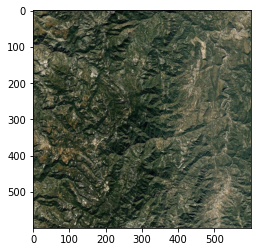

In [10]:
print(f"{os.path.basename(img_path)}")
resize = 300
img = Image.open(img_path).convert('RGB')
fig = plt.figure()
plt.imshow(img)
tf = transforms.Compose([
    transforms.Resize((resize, resize)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                        std=[0.229, 0.224, 0.225])
])

img = tf(img).unsqueeze(0).to(device)

model = make_model()
model.load_state_dict(torch.load(weight_name))   
pred_class = model(img)
print(pred_class)
print(pred_class.argmax(dim=1))
print(get_class_name(pred_class.argmax(dim=1)))